In [7]:
import yfinance as yf

data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")


[*********************100%%**********************]  1 of 1 completed


In [7]:
import pandas as pd 
data.index = pd.to_datetime(data.index)

In [8]:
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059425,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925644,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750252,132079200


## Backtesting

### SMA

In [15]:
data['SMA1'] = data['Close'].rolling(42).mean()
data['SMA2'] = data['Close'].rolling(252).mean()

In [16]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA1,SMA2
Date,,,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,187.252381,171.208889
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,187.775000,171.450238
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,188.400238,171.693453
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900,189.004048,171.945635
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800,189.533572,172.209484


In [19]:
%pip install -q matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


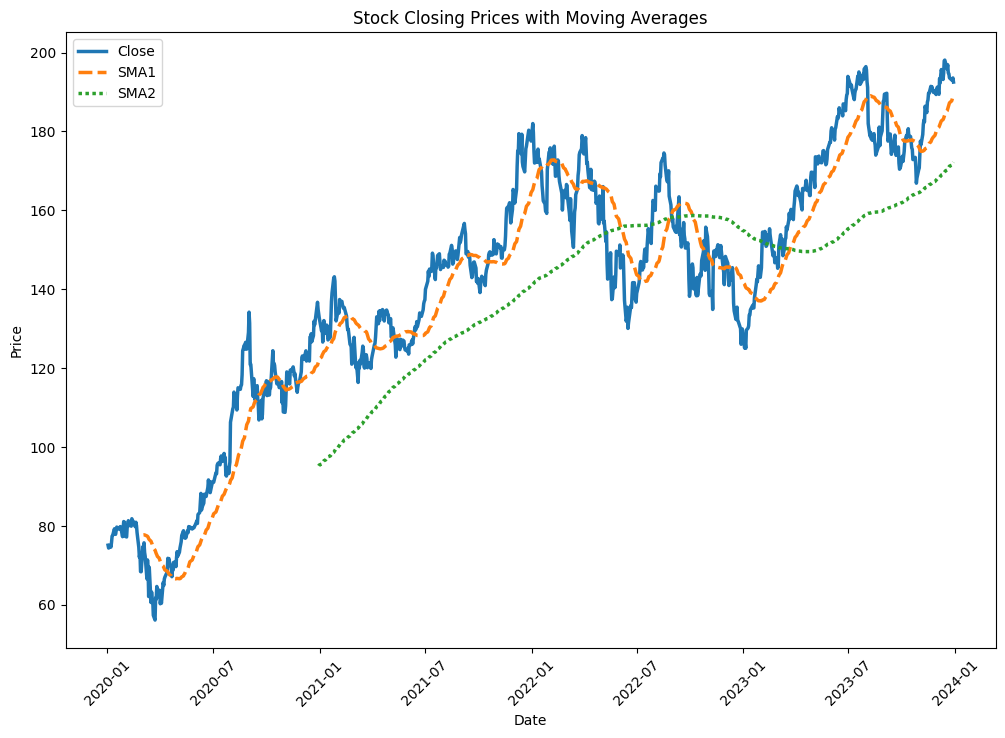

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 8))

# Plotting Closing Prices
sns.lineplot(data=data[["Close", "SMA1", "SMA2"]], palette="tab10", linewidth=2.5)

# Adding labels and title
plt.title("Stock Closing Prices with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)

# Show plot
plt.show()


In [3]:
import sys
sys.path.append(r"E:\dev\pythonLand\finance-mate\src")


In [4]:
from backtester.sma import SMABacktester

In [9]:
sma_backtester = SMABacktester(ticker="AAPL", SMA1=42, SMA2=252, start="2020-01-01", end="2024-01-01")

In [10]:
sma_backtester.prepare_data(data)
sma_backtester.run_strategy()

(1.0, -0.44)

In [11]:
sma_backtester.optimize_parameters((30, 50, 2), (200, 300, 2))


(array([ 48., 212.]), 1.46)

In [1]:
sma_backtester.plot_results()

NameError: name 'sma_backtester' is not defined